In [30]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image


In [31]:
# img = io.imread('butterfly.jpg')
# img_r = (img / 255.0).reshape(-1,3)


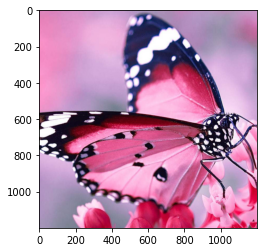

(1200, 1200, 3)


In [32]:
img = image.imread('butterfly.jpg')
imgplot = plt.imshow(img)
plt.show()
print(img.shape)


In [40]:
img_r = (img / 255.0).reshape(-1,3)
print(img_r.shape)

(1440000, 3)


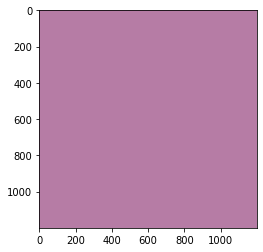

(1200, 1200, 3)


In [34]:
#Fit K-means on resized image. n_clusters is the desired number of colors 
k_colors = KMeans(n_clusters=1).fit(img_r)
#Assign colors to pixels based on their cluster center
#Each row in k_colors.cluster_centers_ represents the RGB value of a cluster centroid
#k_colors.labels_ contains the cluster that a pixel is assigned to
#The following assigns every pixel the color of the centroid it is assigned to
img128=k_colors.cluster_centers_[k_colors.labels_]
#Reshape the image back to 128x128x3 to save
img128=np.reshape(img128, (img.shape))
#Save image
image.imsave('img128.jpg',img128)
img = image.imread('img128.jpg')
imgplot = plt.imshow(img)
plt.show()
print(img.shape)


In [55]:
def image_compress(k):
  for i in (n+1 for n in range(k)):
    #Fit K-means on resized image. n_clusters is the desired number of colors 
    k_colors = KMeans(n_clusters=i).fit(img_r)
    #Assign colors to pixels based on their cluster center
    #Each row in k_colors.cluster_centers_ represents the RGB value of a cluster centroid
    #k_colors.labels_ contains the cluster that a pixel is assigned to
    #The following assigns every pixel the color of the centroid it is assigned to
    img_k=k_colors.cluster_centers_[k_colors.labels_]
    #Reshape the image back to 128x128x3 to save
    img_k=np.reshape(img_k, (1200,1200,3))
    #Save image
    image.imsave('img_k.jpg',img_k)
    img = image.imread('img_k.jpg')
    imgplot = plt.imshow(img)
    plt.title("k means="+str(i))
    plt.show()


In [58]:
from IPython.display import display
import ipywidgets as widgets

from ipywidgets import interactive

w=interactive(image_compress,k=4)
display(w)


interactive(children=(IntSlider(value=4, description='k', max=12, min=-4), Output()), _dom_classes=('widget-in…

In [48]:
import ipywidgets as widgets

int_slider = widgets.IntSlider(min=10, max=50, value=25, step=2, description="Kmeans Slider")
int_slider


IntSlider(value=25, description='Kmeans Slider', max=50, min=10, step=2)

In [50]:
x=int_slider.value
print(x)

50
